## A simple feed forward network for MNIST image classification

In [3]:
# Import the required packages
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Get the training data

In [4]:
# Get the training data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


### Same can be done by using Pandas and Collection libraries as follows:

In [31]:
# import pandas as pd

# classes = pd.Series(train_labels).unique()
# classes_num = len(classes)
# print('Unique output classes : ', classes)
# print('Total number of outputs : ', classes_num)

In [34]:
# from collections import Counter

# label_counts = Counter(train_labels)
# classes = list(label_counts.keys())
# classes_num = len(classes)
# print('Unique output classes : ', classes)
# print('Total number of outputs : ', classes_num)

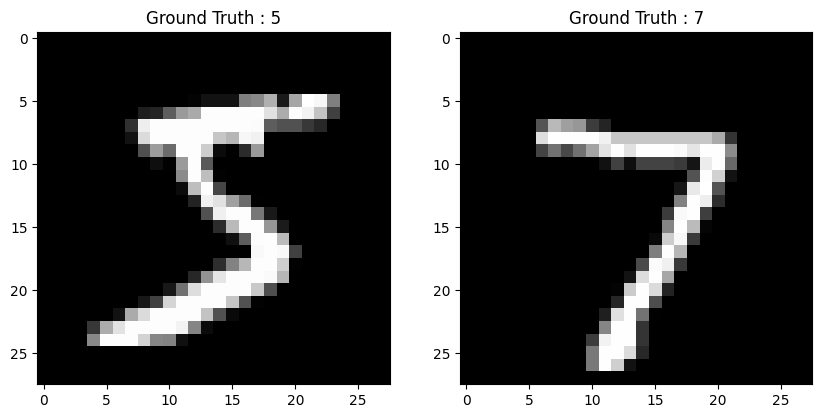

In [6]:
# let's see some sample images in the dataset

# Define the plot size
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
plt.show()

### Alternative: Use seaborn or OpenCV for visualization

In [7]:
# Change the image format from 2D array of size 28x28 to 1D arrya of size 784
print(train_images.shape)

(60000, 28, 28)


In [8]:
# Get the size of required 1D array

dim_data = np.prod(train_images.shape[1:])
print(dim_data)

784


In [9]:
# Now reshape the 2D array to 1D array

train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [10]:
# Change to float datatype

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [11]:
# Change the labels from integer to categorical data

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Check how the one hot encoded labels look like
print(test_labels_one_hot[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [12]:
# Define the model

model = Sequential() # type of model

# Define the model layers

model.add(Dense(32, activation='relu', input_shape=(dim_data,)))
model.add(Dense(classes_num, activation='softmax'))

# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Let's see how the model looks and check the parameters

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [14]:
# Now we can start the training

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=2, verbose =1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4205 - loss: 24.0427 - val_accuracy: 0.5638 - val_loss: 1.4739
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6280 - loss: 1.3239 - val_accuracy: 0.7052 - val_loss: 1.0738


## Evaluate the model

In [15]:
# let's run the trained model on test data and see how it performs

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6856 - loss: 1.1851
Evaluation result on Test Data : Loss = 1.0737723112106323, accuracy = 0.7052000164985657


## Run the sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Probability of all the classes: [[5.5540439e-09 3.5508783e-18 9.8683888e-01 1.9482945e-03 2.6335550e-14
  1.0626736e-04 1.5126175e-03 9.5752748e-03 1.8748557e-05 4.0530212e-17]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Model prediction: 2


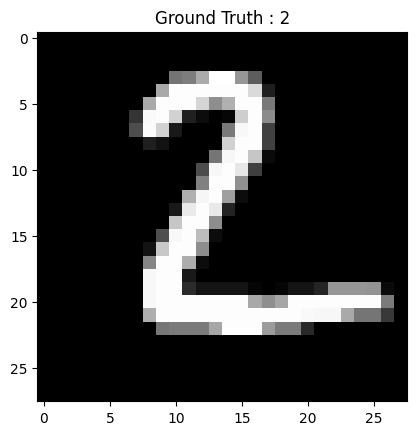

In [16]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[1],:])))

print("Model prediction: {}".format(np.argmax(model.predict(test_data[[1],:])),axis=1))

# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Probability of all the classes: [[5.5418724e-08 4.8294208e-16 9.7585267e-01 4.1274000e-03 1.2675258e-12
  3.1582185e-04 3.2622691e-03 1.6367365e-02 7.4494121e-05 4.3856639e-15]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model prediction: 2


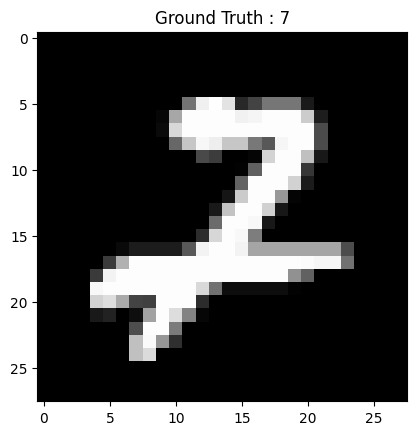

In [17]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[9009]])))

print("Model prediction: {}".format(np.argmax(model.predict(test_data[[9009]])),axis=1))

# Display the predicted image
plt.imshow(test_images[9009], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[9009]))
plt.show()

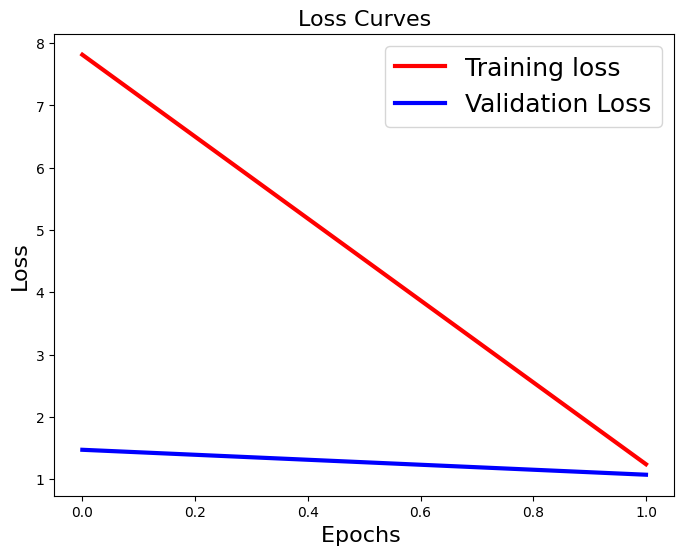

In [18]:
# Let us observe the training over the epochs

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

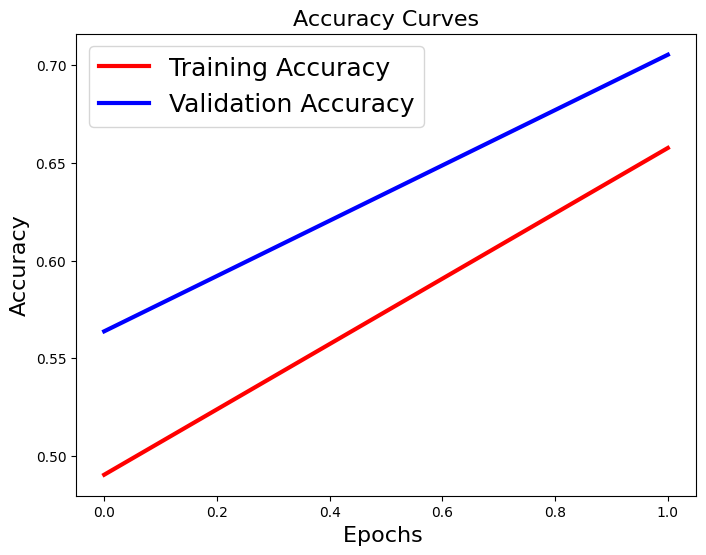

In [19]:

#Plot the Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

### Confusion Matrix

In [20]:
DIGITS = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
}

In [21]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([DIGITS[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([DIGITS[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [22]:
print(confusion_matrix(test_labels_one_hot, model.predict(test_data)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Pred    0     1    2    3    4    5    6    7    8   9
True                                                  
0     759     0    1    1    0    6   55    3  148   7
1       1  1030    0    2    1    1    8    1   89   2
2       5     0  739   13    2    6   17    6  243   1
3       3     2   13  703    0   62   12    6  202   7
4       0     3    3    1  509    0    9    1  446  10
5       1    10    1   21    3  658   20    8  167   3
6       9     3    5    0   23    5  813    1   95   4
7       2     3   37    4    2    1    2  845  124   8
8       1     1    5    5    3   26   12    4  914   3
9       1     2    1    4   34   10    2   20  853  82


## Classification report

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:

y_true = np.argmax(test_labels_one_hot, axis=1)
y_pred = np.argmax(model.predict(test_data), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [26]:
report = classification_report(y_true, y_pred,digits=4)

In [27]:
print(report)

              precision    recall  f1-score   support

           0     0.9706    0.7745    0.8615       980
           1     0.9772    0.9075    0.9411      1135
           2     0.9180    0.7161    0.8046      1032
           3     0.9324    0.6960    0.7971      1010
           4     0.8821    0.5183    0.6530       982
           5     0.8490    0.7377    0.7894       892
           6     0.8558    0.8486    0.8522       958
           7     0.9441    0.8220    0.8788      1028
           8     0.2786    0.9384    0.4296       974
           9     0.6457    0.0813    0.1444      1009

    accuracy                         0.7052     10000
   macro avg     0.8254    0.7040    0.7152     10000
weighted avg     0.8286    0.7052    0.7177     10000



In [28]:
print(accuracy_score(y_true, y_pred))

0.7052
